<a href="https://colab.research.google.com/github/kebi22/Olympics_dataset_1896-2022_Project_programming-database_23-24/blob/main/Olympics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [79]:
Athelets_df=pd.read_csv('olympic_athletes.csv')
Hosts_df=pd.read_csv('olympic_hosts.csv')
Medals_df=pd.read_csv('olympic_medals.csv')


In [80]:
Athelets_df.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1.0,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2.0,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1.0,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1.0,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1.0,Beijing 2022,1989.0,NaN,NaN


In [163]:
Athelets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42536 entries, 0 to 42560
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Full_Name            42536 non-null  object 
 1   Game_ParticipationS  42536 non-null  float64
 2   First_Game           42536 non-null  object 
 3   Birth_year           42536 non-null  int64  
 4   TotalMedals_Won      7660 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.9+ MB


In [82]:
regex_pattern = r'\b(10|[1-9])\b'

In [83]:
Athelets_df['TotalAthlets_medals'] = Athelets_df['athlete_medals'].str.extract(regex_pattern)


In [84]:
Athelets_df.TotalAthlets_medals.value_counts()

1    6404
2     924
3     209
4      76
5      24
6      12
8       7
7       5
9       1
Name: TotalAthlets_medals, dtype: int64

In [85]:
Athelets_df=Athelets_df.drop(columns=['athlete_medals'])

In [86]:
Athelets_df['TotalAthlets_medals'] = pd.to_numeric(Athelets_df['TotalAthlets_medals'], errors='coerce')


In [87]:
Athelets_df.rename(columns={

    'athlete_full_name': 'Full_Name',
    'games_participations': 'Game_ParticipationS',
    'first_game': 'First_Game',
    'athlete_year_birth': 'Birth_year',
    'TotalAthlets_medals': 'TotalMedals_Won',



}, inplace=True)

In [88]:
Athelets_df.Full_Name.value_counts(dropna=False)

Ivan IVANOV              4
Luis MARTINEZ            4
Jose PEREZ               4
Nan WANG                 4
Dan LI                   3
                        ..
Mercy Wanjiku NJOROGE    1
Clarisse CRUZ            1
Polina JELIZAROVA        1
Bridget FRANEK           1
John HYLAN               1
Name: Full_Name, Length: 42358, dtype: int64

In [89]:
Athelets_df.drop(columns=['bio','athlete_url'],inplace=True)

In [90]:
median_year_birth = Athelets_df['Birth_year'].median()


In [91]:
Athelets_df['Birth_year'].fillna(median_year_birth, inplace=True)

In [92]:
Athelets_df['Birth_year'] = Athelets_df['Birth_year'].astype(int)


In [93]:

# Function to reformat the name
def reformat_name(full_name):
    parts = full_name.split()
    # Check if there are at least two parts (first name and last name)
    if len(parts) > 1:
        first_name = parts[0].capitalize()
        # Capitalize each part of the last name which could be hyphenated or single
        last_name = '-'.join(sub.capitalize() for sub in parts[1].split('-'))
        # Combine the first name and the reformatted last name
        return f"{first_name} {last_name}"
    elif len(parts) == 1:
        # Handle cases with only one part in the name
        return parts[0].capitalize()
    else:
        # Handle empty strings or unexpected cases
        return full_name




In [94]:
# Apply the function to the athlete_full_name column
Athelets_df['Full_Name'] = Athelets_df['Full_Name'].apply(reformat_name)


In [95]:
Athelets_df = Athelets_df.dropna(subset=['First_Game'])


In [97]:
Athelets_df.First_Game.value_counts(dropna=False)

Rio 2016                  3593
Beijing 2008              3490
London 2012               3475
Barcelona 1992            3379
Tokyo 2020                3363
Atlanta 1996              3357
Seoul 1988                3307
Sydney 2000               3246
Athens 2004               3191
Los Angeles 1984          2769
Sochi 2014                1041
Beijing 2022              1023
PyeongChang 2018           965
Vancouver 2010             889
Turin 2006                 885
Albertville 1992           879
Salt Lake City 2002        783
Nagano 1998                740
Calgary 1988               629
Lillehammer 1994           472
Moscow 1980                411
Sarajevo 1984              233
Montreal 1976              222
Munich 1972                 85
Lake Placid 1980            54
Mexico City 1968            19
Innsbruck 1976              18
Tokyo 1964                  10
Rome 1960                    5
Sapporo 1972                 5
Helsinki 1952                2
Grenoble 1968                2
Berlin 1

In [98]:
Athelets_df[Athelets_df.duplicated(keep =  False)].sort_values(by = "Full_Name")

,Full_Name,Game_ParticipationS,First_Game,Birth_year,TotalMedals_Won
38077,Ahmed El,1.0,Seoul 1988,1961,NaN
38451,Ahmed El,1.0,Seoul 1988,1961,NaN
10243,Carlos Andres,1.0,Rio 2016,1992,NaN
10673,Carlos Andres,1.0,Rio 2016,1992,NaN
22167,Jose Antonio,1.0,Athens 2004,1976,NaN
23998,Jose Antonio,1.0,Athens 2004,1976,NaN
33545,Jose Maria,1.0,Barcelona 1992,1968,NaN
34718,Jose Maria,1.0,Barcelona 1992,1968,NaN
19208,Juan Carlos,3.0,Sydney 2000,1978,NaN
19320,Juan Carlos,3.0,Sydney 2000,1978,NaN


In [99]:
Athelets_df=Athelets_df.drop_duplicates()

In [100]:
Athelets_df.to_csv('olympic_athletes.csv.csv', index=False)

In [101]:
Athelets_df

,Full_Name,Game_ParticipationS,First_Game,Birth_year,TotalMedals_Won
0,Cooper Woods-Topalovic,1.0,Beijing 2022,2000,NaN
1,Felix Elofsson,2.0,PyeongChang 2018,1995,NaN
2,Dylan Walczyk,1.0,Beijing 2022,1993,NaN
3,Olli Penttala,1.0,Beijing 2022,1995,NaN
4,Dmitriy Reikherd,1.0,Beijing 2022,1989,NaN
...,...,...,...,...,...
42556,Amon Neequaye,1.0,Los Angeles 1984,1965,NaN
42557,Stefan Gertel,1.0,Los Angeles 1984,1960,NaN
42558,Hugh Dyer,1.0,Los Angeles 1984,1961,NaN
42559,Firmin Abissi,2.0,Moscow 1980,1955,NaN


In [102]:
Medals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


Medals_df

In [103]:
Medals_df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [104]:
Medals_df.rename(columns={
    'discipline_title': 'Descipline',
    'slug_game':'Slug_Game',
    'event_title': 'Event',
        'event_gender': 'Gender',
        'medal_type': 'Medal',
    'participant_type': 'Participant_Type',
    'athlete_full_name':'Full_Name',
    'country_name':'Country',
    'country_3_letter_code':'Country_Code'



}, inplace=True)

In [105]:
df=Medals_df.Full_Name.isna()

In [106]:
Medals_df

,Descipline,Slug_Game,Event,Gender,Medal,Participant_Type,participant_title,athlete_url,Full_Name,Country,country_code,Country_Code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE
...,...,...,...,...,...,...,...,...,...,...,...,...
21692,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/viggo-jensen,Viggo JENSEN,Denmark,DK,DEN
21693,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Athlete,NaN,NaN,Alexandros Nikolopoulos,Greece,GR,GRE
21694,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/viggo-jensen,Viggo JENSEN,Denmark,DK,DEN
21695,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/launceston-el...,Launceston ELLIOT,Great Britain,GB,GBR


In [107]:
Medals_df.drop(columns=['participant_title'], inplace=True)
Medals_df.drop(columns=['country_code'], inplace=True)
Medals_df=Medals_df.drop(columns=['athlete_url'])

In [108]:
Medals_df=Medals_df.dropna(subset=['Full_Name'])

In [109]:
Medals_df['Full_Name'] = Medals_df['Full_Name'].apply(reformat_name)


In [110]:
Medals_df[Medals_df.duplicated(keep =  False)].sort_values(by = "Full_Name")


,Descipline,Slug_Game,Event,Gender,Medal,Participant_Type,Full_Name,Country,Country_Code
17693,Sailing,london-1948,twoperson keelboat open Star mixed,Open,SILVER,GameTeam,Carlos De,Cuba,CUB
17694,Sailing,london-1948,twoperson keelboat open Star mixed,Open,SILVER,GameTeam,Carlos De,Cuba,CUB


In [111]:
Medals_df=Medals_df.drop_duplicates()

In [112]:
Medals_df.head()

,Descipline,Slug_Game,Event,Gender,Medal,Participant_Type,Full_Name,Country,Country_Code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Stefania Constantini,Italy,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Amos Mosaner,Italy,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Kristin Skaslien,Norway,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Magnus Nedregotten,Norway,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Almida De,Sweden,SWE


In [113]:
Medals_df.to_csv('olympic_medals.csv.csv', index=False)

In [114]:
Hosts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


In [115]:
merged_df = pd.merge(Medals_df, Hosts_df, left_on='Slug_Game', right_on='game_slug', how='left')


In [116]:
merged_df = pd.merge(Medals_df, Hosts_df[['game_slug','game_year', 'game_season']],
                     left_on='Slug_Game', right_on='game_slug',
                     how='left').drop(columns='game_slug')


In [117]:
merged_df

,Descipline,Slug_Game,Event,Gender,Medal,Participant_Type,Full_Name,Country,Country_Code,game_year,game_season
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Stefania Constantini,Italy,ITA,2022,Winter
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Amos Mosaner,Italy,ITA,2022,Winter
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Kristin Skaslien,Norway,NOR,2022,Winter
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Magnus Nedregotten,Norway,NOR,2022,Winter
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Almida De,Sweden,SWE,2022,Winter
...,...,...,...,...,...,...,...,...,...,...,...
18067,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,SILVER,Athlete,Viggo Jensen,Denmark,DEN,1896,Summer
18068,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Athlete,Alexandros Nikolopoulos,Greece,GRE,1896,Summer
18069,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,GOLD,Athlete,Viggo Jensen,Denmark,DEN,1896,Summer
18070,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,SILVER,Athlete,Launceston Elliot,Great Britain,GBR,1896,Summer


In [118]:
merged_df= pd.merge(merged_df,Athelets_df[['Full_Name','TotalMedals_Won','Birth_year','Game_ParticipationS']],
                    left_on='Full_Name',right_on='Full_Name' ,how='left')

In [119]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18516 entries, 0 to 18515
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Descipline           18516 non-null  object 
 1   Slug_Game            18516 non-null  object 
 2   Event                18516 non-null  object 
 3   Gender               18516 non-null  object 
 4   Medal                18516 non-null  object 
 5   Participant_Type     18516 non-null  object 
 6   Full_Name            18516 non-null  object 
 7   Country              18516 non-null  object 
 8   Country_Code         18516 non-null  object 
 9   game_year            18516 non-null  int64  
 10  game_season          18516 non-null  object 
 11  TotalMedals_Won      8936 non-null   float64
 12  Birth_year           9422 non-null   float64
 13  Game_ParticipationS  9422 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+ MB


In [120]:
merged_df['Age']=merged_df['game_year']-merged_df['Birth_year']

In [121]:
merged_df.to_csv('merged_df.csv',index=False)

In [122]:
top10=merged_df.Country.value_counts().head(10)

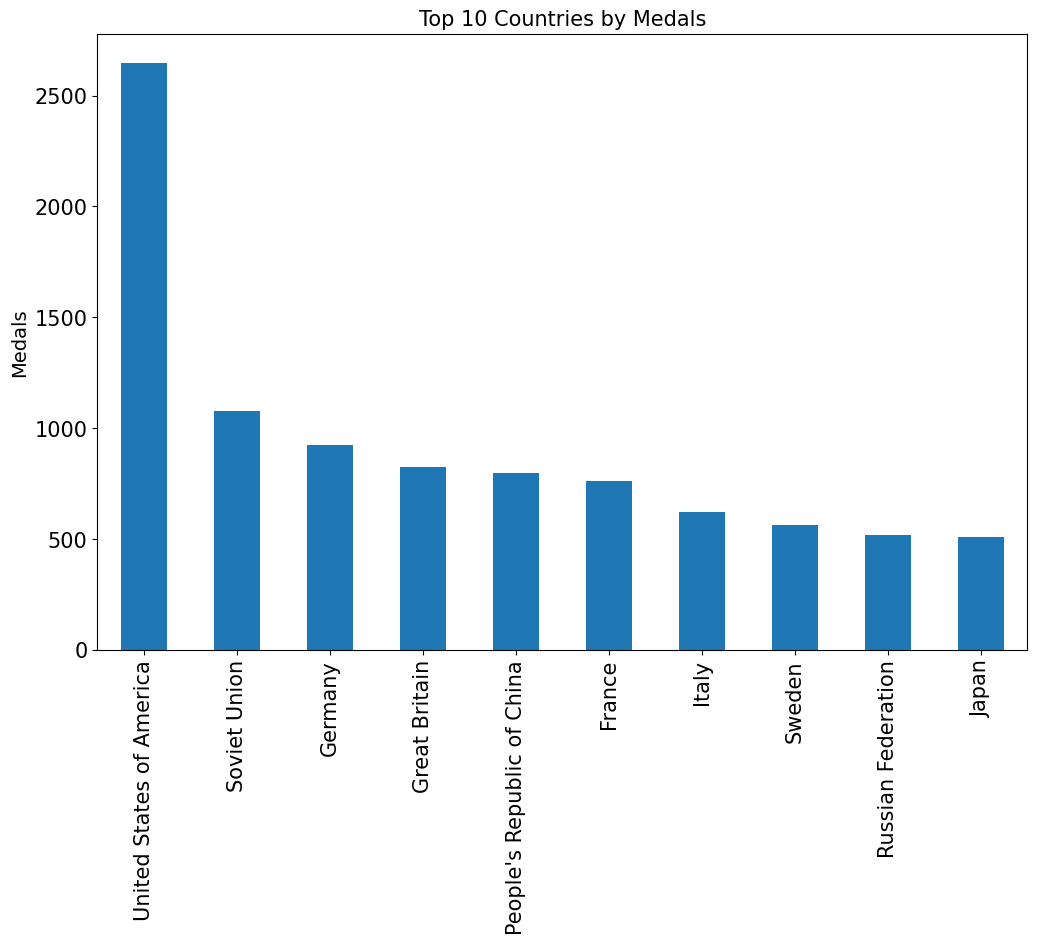

In [123]:
top10.plot(kind = "bar", fontsize = 15, figsize=(12,8))
plt.title("Top 10 Countries by Medals", fontsize = 15)
plt.ylabel("Medals", fontsize = 14)
plt.show()

In [124]:
olympics_10 = merged_df[merged_df.Country.isin(top10.index)]
olympics_10

,Descipline,Slug_Game,Event,Gender,Medal,Participant_Type,Full_Name,Country,Country_Code,game_year,game_season,TotalMedals_Won,Birth_year,Game_ParticipationS,Age
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Stefania Constantini,Italy,ITA,2022,Winter,NaN,NaN,NaN,NaN
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Amos Mosaner,Italy,ITA,2022,Winter,NaN,NaN,NaN,NaN
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Almida De,Sweden,SWE,2022,Winter,NaN,NaN,NaN,NaN
5,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Oskar Eriksson,Sweden,SWE,2022,Winter,NaN,NaN,NaN,NaN
7,Freestyle Skiing,beijing-2022,Men's Moguls,Men,GOLD,Athlete,Walter Wallberg,Sweden,SWE,2022,Winter,1.0,2000.0,2.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18491,Shooting,athens-1896,50m pistol 60 shots men,Men,GOLD,Athlete,Sumner Paine,United States of America,USA,1896,Summer,NaN,NaN,NaN,NaN
18497,Tennis,athens-1896,Singles men,Men,GOLD,Athlete,John Boland,Great Britain,GBR,1896,Summer,NaN,NaN,NaN,NaN
18507,Wrestling,athens-1896,"Unlimited Class, Greco-Roman Men",Men,GOLD,Athlete,Carl Schuhmann,Germany,GER,1896,Summer,NaN,NaN,NaN,NaN
18510,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,GOLD,Athlete,Launceston Elliot,Great Britain,GBR,1896,Summer,NaN,NaN,NaN,NaN


In [164]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18516 entries, 0 to 18515
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Descipline           18516 non-null  object 
 1   Slug_Game            18516 non-null  object 
 2   Event                18516 non-null  object 
 3   Gender               18516 non-null  object 
 4   Medal                18516 non-null  object 
 5   Participant_Type     18516 non-null  object 
 6   Full_Name            18516 non-null  object 
 7   Country              18516 non-null  object 
 8   Country_Code         18516 non-null  object 
 9   game_year            18516 non-null  int64  
 10  game_season          18516 non-null  object 
 11  TotalMedals_Won      8936 non-null   float64
 12  Birth_year           9422 non-null   float64
 13  Game_ParticipationS  9422 non-null   float64
 14  Age                  9422 non-null   float64
dtypes: float64(4), int64(1), object(10)


In [126]:
merged_df.groupby("Country").apply(lambda x: x.Slug_Game.nunique())

Country
Afghanistan                2
Algeria                    7
Argentina                 19
Armenia                    6
Australasia                2
                          ..
Virgin Islands, US         1
West Indies Federation     1
Yugoslavia                15
Zambia                     2
Zimbabwe                   2
Length: 151, dtype: int64

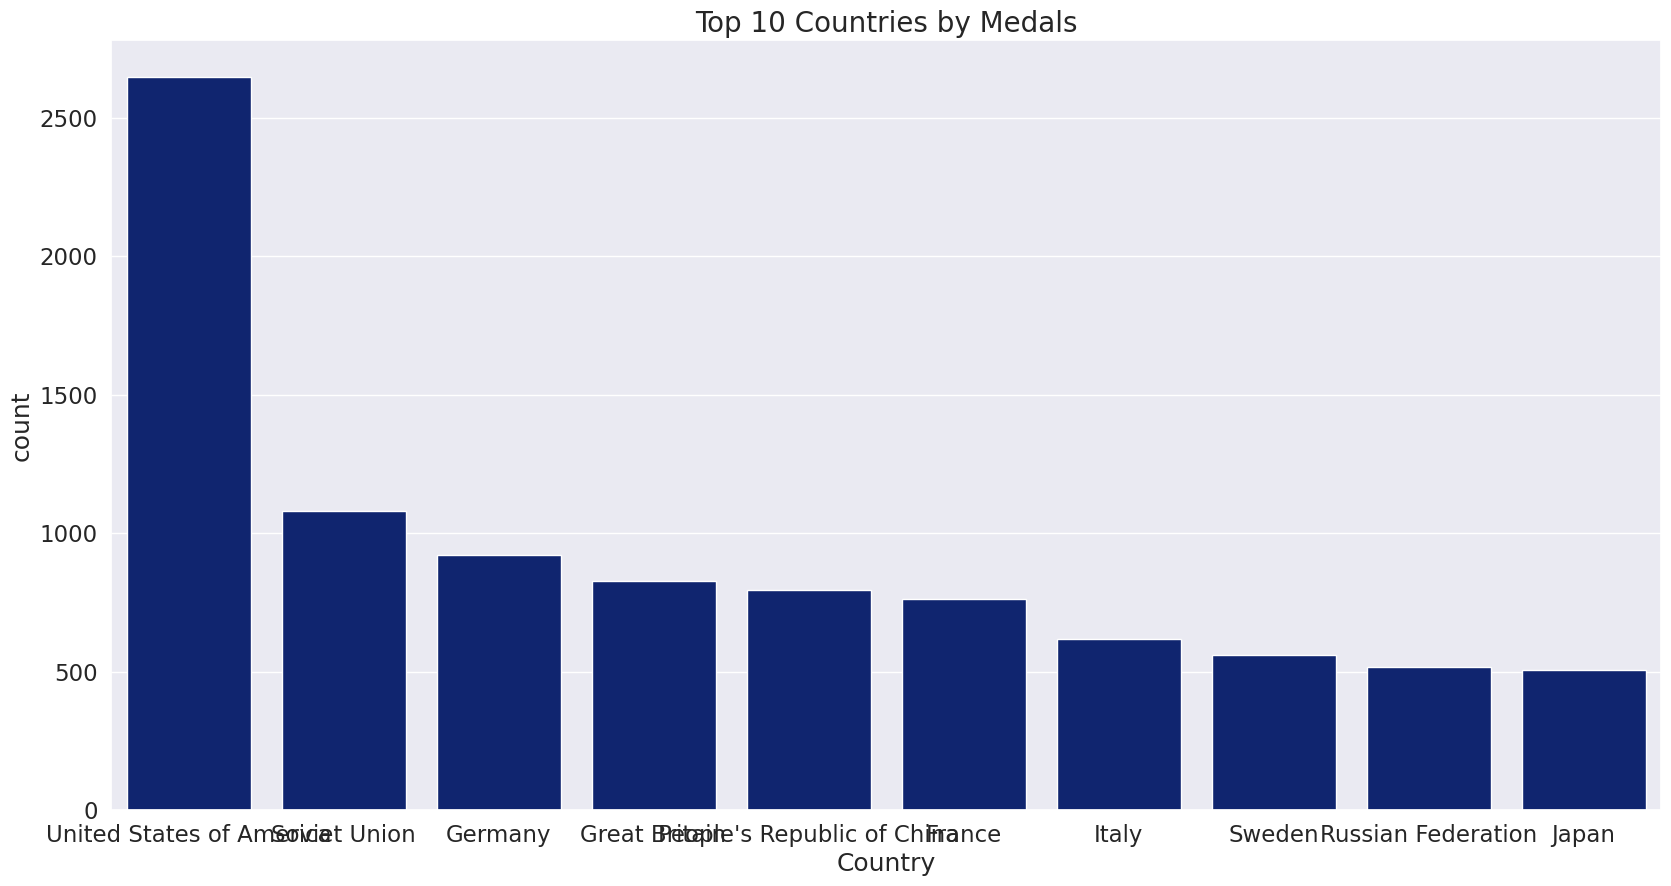

In [167]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", order = top10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

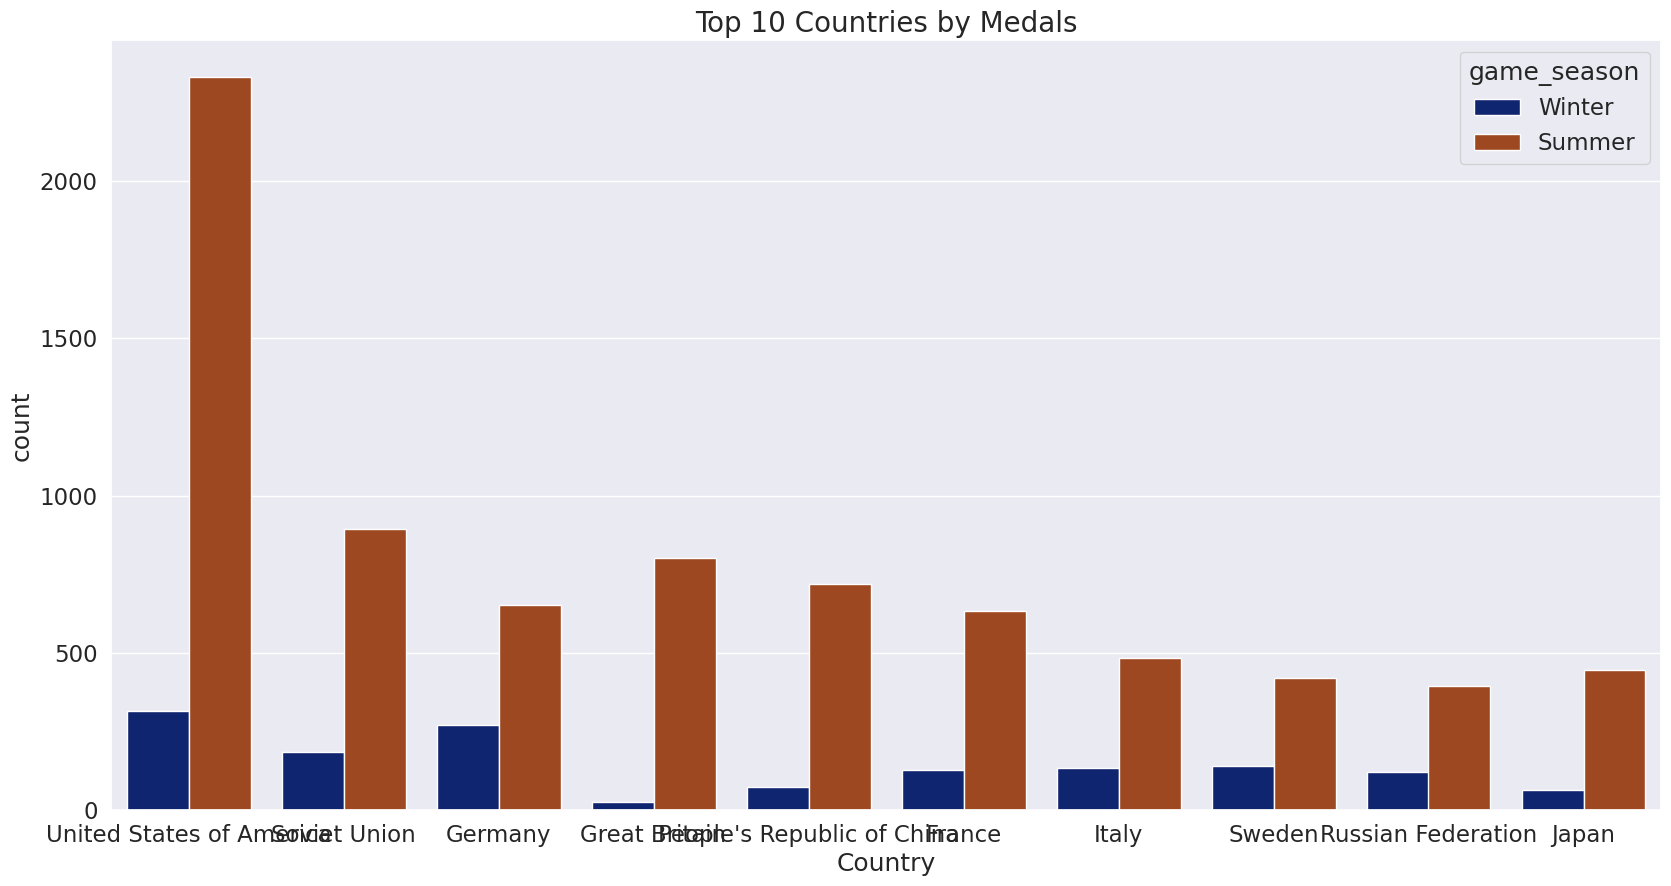

In [166]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
ax=sns.countplot(data = olympics_10, x = "Country", hue = "game_season", order = top10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()


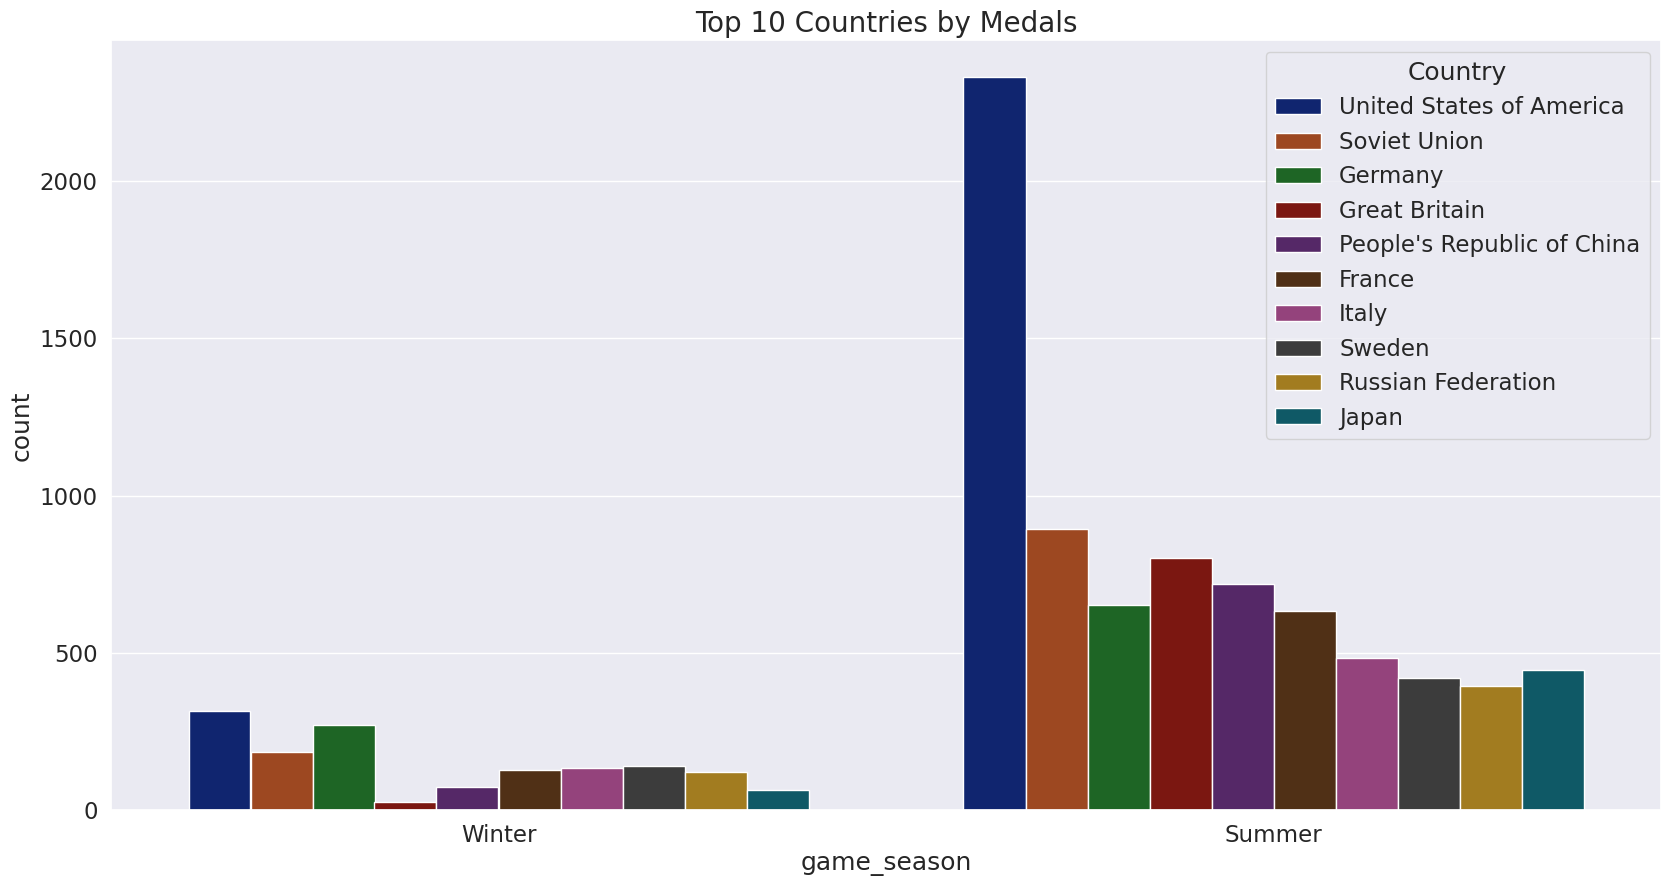

In [165]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "game_season", hue = "Country", hue_order = top10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

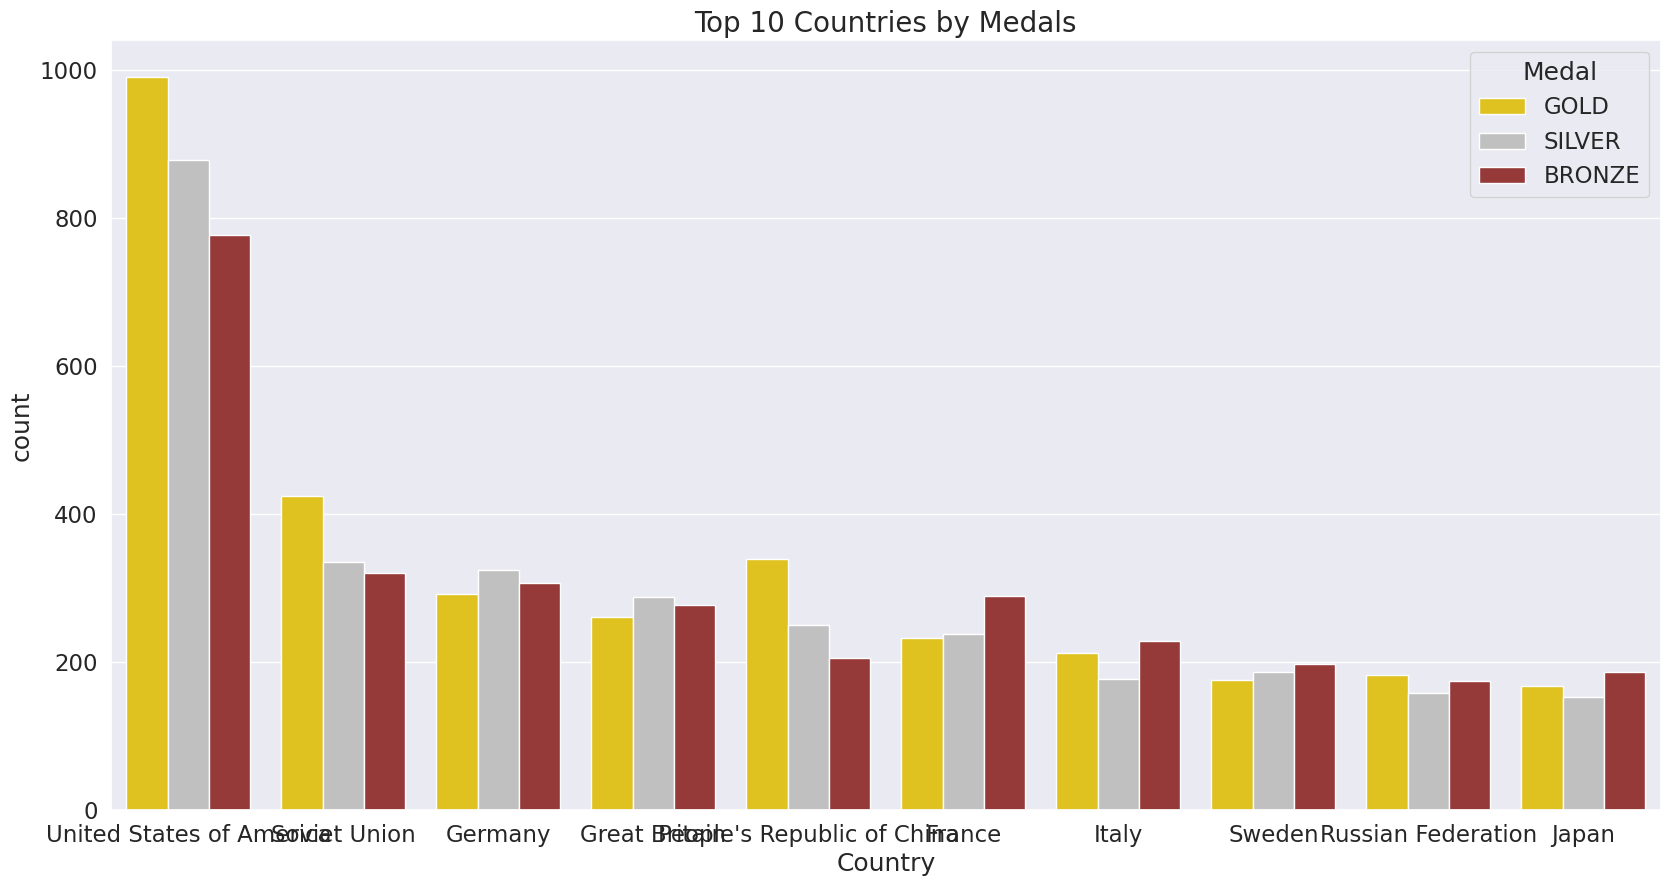

In [168]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", hue = "Medal", order = top10.index,
              hue_order = ["GOLD", "SILVER", "BRONZE"], palette = ["gold", "silver", "brown"])
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

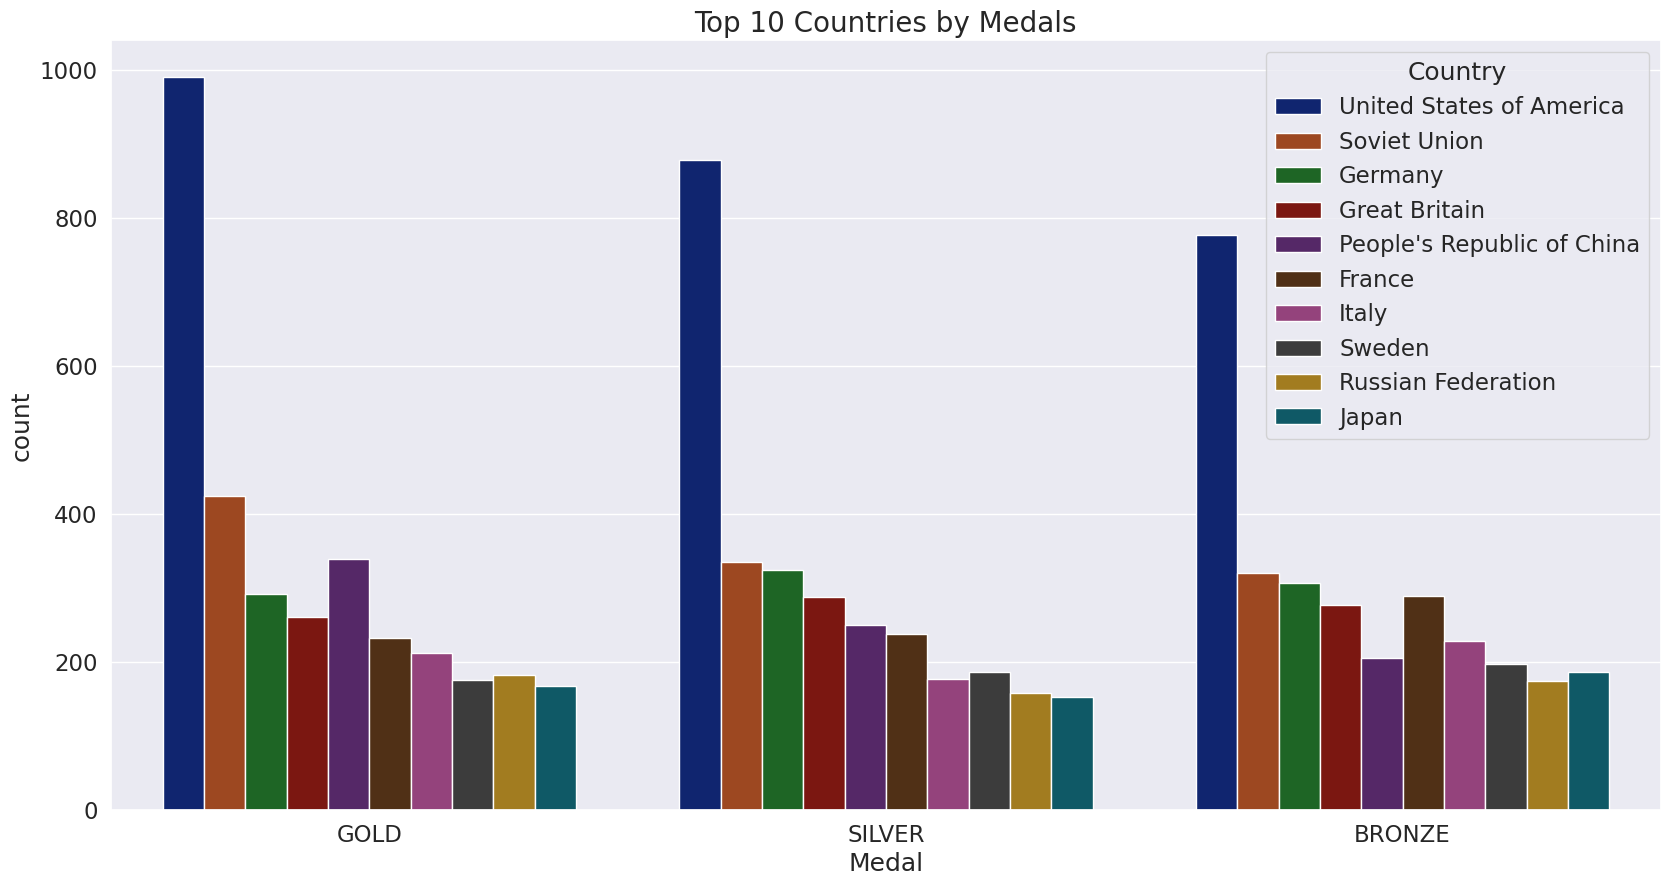

In [169]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Medal", hue = "Country",
              order = ["GOLD", "SILVER", "BRONZE"], hue_order= top10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

In [131]:
# Assuming 'merged_df' is your DataFrame
grouped_data = merged_df.groupby('Gender')[['TotalMedals_Won', 'Game_ParticipationS']].sum()
grouped_data

,TotalMedals_Won,Game_ParticipationS
Gender,,
Men,7715.0,13682.0
Mixed,68.0,146.0
Open,327.0,714.0
Women,5826.0,9499.0


In [132]:
merged_df

,Descipline,Slug_Game,Event,Gender,Medal,Participant_Type,Full_Name,Country,Country_Code,game_year,game_season,TotalMedals_Won,Birth_year,Game_ParticipationS,Age
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Stefania Constantini,Italy,ITA,2022,Winter,NaN,NaN,NaN,NaN
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Amos Mosaner,Italy,ITA,2022,Winter,NaN,NaN,NaN,NaN
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Kristin Skaslien,Norway,NOR,2022,Winter,NaN,NaN,NaN,NaN
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Magnus Nedregotten,Norway,NOR,2022,Winter,NaN,NaN,NaN,NaN
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Almida De,Sweden,SWE,2022,Winter,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18511,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,SILVER,Athlete,Viggo Jensen,Denmark,DEN,1896,Summer,NaN,NaN,NaN,NaN
18512,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Athlete,Alexandros Nikolopoulos,Greece,GRE,1896,Summer,NaN,1970.0,1.0,-74.0
18513,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,GOLD,Athlete,Viggo Jensen,Denmark,DEN,1896,Summer,NaN,NaN,NaN,NaN
18514,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,SILVER,Athlete,Launceston Elliot,Great Britain,GBR,1896,Summer,NaN,NaN,NaN,NaN


In [133]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18516 entries, 0 to 18515
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Descipline           18516 non-null  object 
 1   Slug_Game            18516 non-null  object 
 2   Event                18516 non-null  object 
 3   Gender               18516 non-null  object 
 4   Medal                18516 non-null  object 
 5   Participant_Type     18516 non-null  object 
 6   Full_Name            18516 non-null  object 
 7   Country              18516 non-null  object 
 8   Country_Code         18516 non-null  object 
 9   game_year            18516 non-null  int64  
 10  game_season          18516 non-null  object 
 11  TotalMedals_Won      8936 non-null   float64
 12  Birth_year           9422 non-null   float64
 13  Game_ParticipationS  9422 non-null   float64
 14  Age                  9422 non-null   float64
dtypes: float64(4), int64(1), object(10)


In [134]:
merged_df.Game_ParticipationS.value_counts()

2.0    2661
1.0    2381
3.0    2314
4.0    1292
5.0     532
6.0     157
7.0      59
8.0      21
9.0       5
Name: Game_ParticipationS, dtype: int64

In [170]:
df = pd.read_csv('merged_df.csv')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18516 entries, 0 to 18515
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Descipline           18516 non-null  object 
 1   Slug_Game            18516 non-null  object 
 2   Event                18516 non-null  object 
 3   Gender               18516 non-null  object 
 4   Medal                18516 non-null  object 
 5   Participant_Type     18516 non-null  object 
 6   Full_Name            18516 non-null  object 
 7   Country              18516 non-null  object 
 8   Country_Code         18516 non-null  object 
 9   game_year            18516 non-null  int64  
 10  game_season          18516 non-null  object 
 11  TotalMedals_Won      8936 non-null   float64
 12  Birth_year           9422 non-null   float64
 13  Game_ParticipationS  9422 non-null   float64
 14  Age                  9422 non-null   float64
dtypes: float64(4), int64(1), object(10)


In [172]:



mean_age = df['Age'].mean()

df['Age'].fillna(mean_age, inplace=True)
df=df.dropna(subset='TotalMedals_Won')

In [154]:
df_num=df
var = df['Country']
var2=df['Medal']
var3=df['Gender']
ordered_labels = df.groupby(var)['Game_ParticipationS'].mean().sort_values().index


ordered_labels2 = df.groupby(var2)['Game_ParticipationS'].mean().sort_values().index
ordered_labels3 = df.groupby(var3)['Game_ParticipationS'].mean().sort_values().index

Country_ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
Country_ordinal_label2 = {k: i for i, k in enumerate(ordered_labels2, 0)}
Country_ordinal_label3 = {k: i for i, k in enumerate(ordered_labels3, 0)}

print( Country_ordinal_label3)
print()



{'Mixed': 0, 'Men': 1, 'Women': 2, 'Open': 3}



In [155]:
    df_num['Country'] = df['Country'].map(Country_ordinal_label)


In [156]:
df_num['Gender'] = df['Gender'].map(Country_ordinal_label3)


In [173]:
df_num['Medal'] = df['Medal'].map(Country_ordinal_label2)
df_num.dropna(subset='TotalMedals_Won')

,Descipline,Slug_Game,Event,Gender,Medal,Participant_Type,Full_Name,Country,Country_Code,game_year,game_season,TotalMedals_Won,Birth_year,Game_ParticipationS,Age
6,Freestyle Skiing,beijing-2022,Men's Moguls,1,1,Athlete,Mikael Kingsbury,77,CAN,2022,Winter,1.0,1992.0,3.0,30.0
7,Freestyle Skiing,beijing-2022,Men's Moguls,1,2,Athlete,Walter Wallberg,94,SWE,2022,Winter,1.0,2000.0,2.0,22.0
8,Freestyle Skiing,beijing-2022,Men's Moguls,1,0,Athlete,Ikuma Horishima,43,JPN,2022,Winter,1.0,1997.0,2.0,25.0
9,Freestyle Skiing,beijing-2022,Men's Freeski Halfpipe,1,2,Athlete,Nico Porteous,92,NZL,2022,Winter,1.0,2001.0,2.0,21.0
10,Freestyle Skiing,beijing-2022,Men's Freeski Halfpipe,1,1,Athlete,David Wise,46,USA,2022,Winter,2.0,1990.0,3.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17953,Athletics,st-louis-1904,56lb weight throw 254kg men,1,1,Athlete,John Joseph,46,USA,1904,Summer,1.0,1956.0,1.0,-52.0
17967,Athletics,st-louis-1904,hammer throw men,1,2,Athlete,John Joseph,46,USA,1904,Summer,1.0,1989.0,2.0,-85.0
17968,Athletics,st-louis-1904,hammer throw men,1,2,Athlete,John Joseph,46,USA,1904,Summer,1.0,1956.0,1.0,-52.0
18288,Athletics,paris-1900,hammer throw men,1,2,Athlete,John Joseph,46,USA,1900,Summer,1.0,1989.0,2.0,-89.0


In [174]:
x= df_num[['game_year','TotalMedals_Won', 'Country','Age','Gender']]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8936 entries, 6 to 18289
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_year        8936 non-null   int64  
 1   TotalMedals_Won  8936 non-null   float64
 2   Country          8936 non-null   int64  
 3   Age              8936 non-null   float64
 4   Gender           8936 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 418.9 KB


In [175]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [176]:
y = df['Game_ParticipationS']
model =  RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [177]:
y_pred = model.predict(x_test)
y_pred

array([2.51666667, 3.52166667, 3.53      , ..., 2.93833333, 2.46      ,
       3.82178571])

In [180]:

#print(accuracy_score(y_test,y_pred))
r = mean_squared_error(y_test, y_pred)
r

1.1387853738850369